## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [144]:
x_train.shape

(60000, 28, 28)

In [145]:
y_train.shape

(60000,)

In [146]:
x_test.shape

(10000, 28, 28)

In [147]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [148]:
y_train[0:2]

array([9, 0], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [152]:
y_train[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:

x_train=x_train/255
x_test=x_test/255

In [0]:
#first conv layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
#second conv layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.30))

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#max_pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [0]:
call_parameter=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [161]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32,
          callbacks=[call_parameter])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3746 - acc: 0.8653 - val_loss: 0.3127 - val_acc: 0.8831
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2433 - acc: 0.9097 - val_loss: 0.2679 - val_acc: 0.9042
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1974 - acc: 0.9269 - val_loss: 0.2237 - val_acc: 0.9168
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1645 - acc: 0.9384 - val_loss: 0.2232 - val_acc: 0.9181
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1370 - acc: 0.9487 - val_loss: 0.2150 - val_acc: 0.9235
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1160 - acc: 0.9571 - val_loss: 0.2226 - val_acc: 0.9235
Epoch 7/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0953 - acc: 0.9640 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True, 
                                                                 validation_split=0.2)

In [0]:
import numpy as np
x_train=np.expand_dims(x_train,-1)

In [0]:
X_test=np.expand_dims(x_test,-1)

In [0]:
train_generator=datagen.flow(x_train,batch_size=64)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

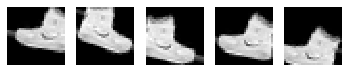

In [167]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.BatchNormalization(input_shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(tf.keras.layers.Dropout(0.30))
#max_pool layer
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))



In [0]:
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [171]:
train_generator.next().shape

(64, 28, 28, 1)

In [0]:
train_generator1=datagen.flow(x_train,y=y_train,batch_size=64)

In [193]:
model1.fit(train_generator1,          
          validation_data=(x_test,y_test),
          epochs=10,
          callbacks=[call_parameter])

Epoch 1/10
938/938 [==============================] - 16s 18ms/step - loss: 0.3721 - acc: 0.8619 - val_loss: 0.3588 - val_acc: 0.8720
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3714 - acc: 0.8623 - val_loss: 0.3385 - val_acc: 0.8796
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3711 - acc: 0.8637 - val_loss: 0.3463 - val_acc: 0.8724
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3643 - acc: 0.8658 - val_loss: 0.3524 - val_acc: 0.8737
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3590 - acc: 0.8673 - val_loss: 0.3262 - val_acc: 0.8817
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3553 - acc: 0.8691 - val_loss: 0.3393 - val_acc: 0.8780
Epoch 7/10
938/938 [==============================] - 16s 18ms/step - loss: 0.3545 - acc: 0.8704 - val_loss: 0.3323 - val_acc: 0.8821
Epoch 8/10
938/938 [==============================] - 16s 17ms

###  Report the final train and validation accuracy

In [196]:
model1.evaluate(train_generator1)

938/938 [==============================] - 14s 15ms/step - loss: 0.3446 - acc: 0.8736


[0.3445911832741583, 0.8735833]

In [197]:
model1.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.3300 - acc: 0.8802


[0.33002440586090087, 0.8802]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [201]:
(sx_train, sy_train), (sx_test, sy_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [202]:
sx_train.shape

(50000, 32, 32, 3)

In [203]:
sx_test.shape

(10000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,rotation_range=60)

### **Prepare/fit the generator.**

In [0]:
trans_array= transform_fn.random_transform(sx_train[4])

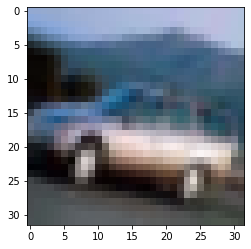

In [224]:
plt.imshow(trans_array)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

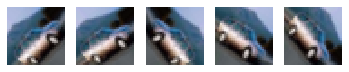

In [225]:
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    trans_array= transform_fn.random_transform(sx_train[4])
    plt.imshow(trans_array)
plt.show()